In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
df_can = {}
df_cdr = {}
df_put = {}

for i in range(10, 17):
    df_can[i] = pd.read_csv("data/can." + str(i) + ".csv.gz", index_col=0)
    df_cdr[i] = pd.read_csv("data/cdr." + str(i) + ".csv.gz", index_col=0)
    df_put[i] = pd.read_csv("data/put." + str(i) + ".csv.gz", index_col=0)

In [28]:
max_len = 13
df_can[13].ix[:, 18:]

,y5,y6,y7,y8,y9,y10,y11,y12,z1,z2,...,z4,z5,z6,z7,z8,z9,z10,z11,z12,len
0,0.764345,-0.353615,-1.051996,2.220601,1.137939,1.707754,-0.928771,-1.668122e-17,2.691705,5.840160,...,11.926618,14.499605,16.947755,14.673837,12.773252,9.043037,5.981117,3.337655,8.881302e-16,13
1,-4.222262,-4.403790,1.703573,4.126091,3.714236,2.590945,-0.467316,8.212902e-16,2.566738,6.027300,...,11.009653,14.300439,15.909409,12.671754,11.825956,8.124510,5.520582,3.337897,-7.969409e-16,13
2,-3.703617,-2.105139,4.211492,2.353441,3.406361,2.225865,-0.717478,4.198903e-16,2.716416,5.892738,...,11.697559,15.276210,16.917075,14.184841,10.941755,7.325558,5.510338,3.173970,1.445938e-16,13
3,-0.726747,0.734434,2.625480,3.808771,1.646396,1.227935,-1.221665,8.621260e-16,2.863772,5.735077,...,12.062958,14.125635,14.063170,10.823844,11.285264,9.010825,5.885712,3.036122,-1.123430e-16,13
4,-1.226253,-1.162633,-0.278021,2.836341,3.089328,2.156136,-0.554974,-6.407638e-16,2.680881,5.998399,...,12.642758,16.256341,16.524347,12.962867,11.953455,8.426807,5.656018,3.129118,6.174916e-16,13
5,-0.008257,-2.408648,-2.069953,0.757466,3.212790,2.552679,-0.567623,5.893417e-16,2.533523,6.017183,...,12.722117,15.953242,15.268863,11.437603,10.033994,7.310896,5.389010,3.283707,-7.992199e-16,13
6,-3.333308,-2.013016,0.143982,3.594866,3.378898,2.500170,-0.466308,-2.355689e-16,2.712325,6.174988,...,11.217861,15.054273,16.240252,13.123604,11.810110,8.012921,5.585995,3.254982,-1.106897e-17,13
7,-1.784884,1.818057,1.640470,0.026259,1.593736,2.105693,-0.617163,-5.740470e-16,2.687517,5.830262,...,11.128662,14.415352,15.647101,14.825545,11.393413,7.958398,5.942625,3.291307,3.292181e-16,13
8,-0.420757,-1.713569,0.295274,2.595587,1.461868,1.697956,-0.975193,-2.573894e-16,2.837938,5.973774,...,10.878673,14.259733,15.708982,13.285005,11.917981,8.324264,5.818567,3.136362,1.198501e-16,13
9,-4.325484,-0.794761,2.338524,3.877979,1.436023,1.412333,-0.624776,-5.866311e-17,2.738145,6.225188,...,9.108244,12.543732,13.861104,13.406366,11.603105,8.715642,6.138366,3.048180,1.558590e-16,13


13
13
14


ValueError: x and y must have same first dimension

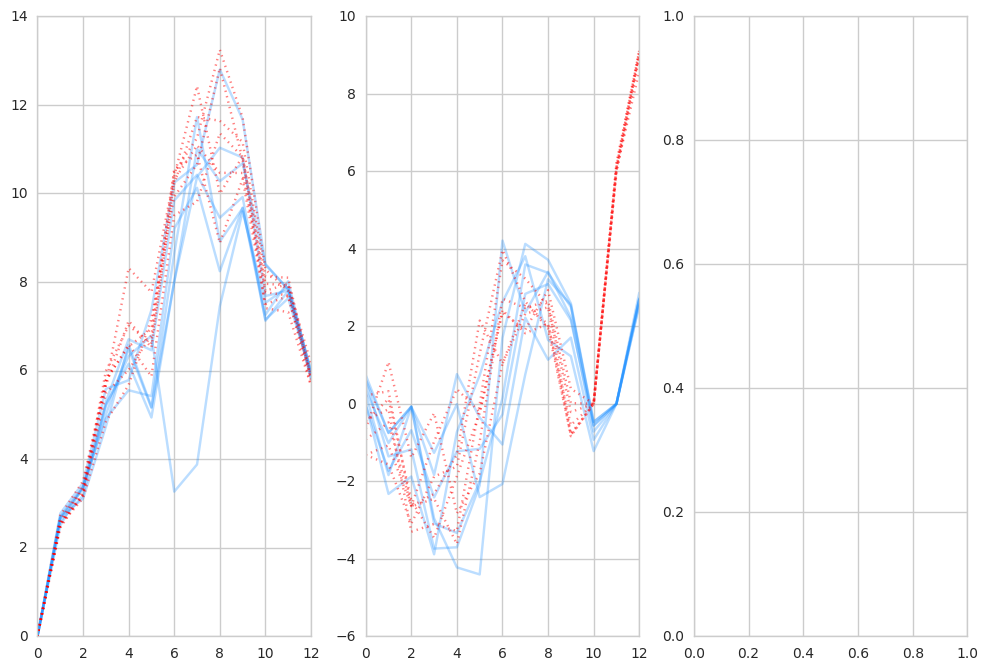

In [17]:
def plot_coord(coord, max_len, ax):
    if coord == "x": 
        start, end = 1, max_len+1
    elif coord == "y":
        start, end = max_len+1, 2*(max_len) + 1
    elif coord == "z":
        start, end = 2*(max_len) + 1, 3*(max_len) + 1
#     ax.plot(range(max_len), df_put[:, start:end], alpha=.05
    print(end - start)
    for i in range(len(df_can)):
        ax.plot(range(max_len), df_can[max_len].ix[i, start:end], alpha=.3, c="dodgerblue")
    for i in range(len(df_cdr)):
        ax.plot(range(max_len), df_cdr[max_len].ix[i, start:end], alpha=.5, c="red", linestyle=":")
    
fig, ax = plt.subplots(ncols=3, nrows=1)  
fig.set_figwidth(12)
fig.set_figheight(8)

plot_coord("x", 13, ax[0])
plot_coord("y", 13, ax[1])
plot_coord("z", 13, ax[2])